In [1]:
import numpy as np
import pandas as pd

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import matplotlib.pyplot as plt

In [3]:
oil_df = pd.read_csv('DCOILBRENTEU.csv')

In [4]:
oil_df

,DATE,DCOILBRENTEU
0,2015-11-02,47.91
1,2015-11-03,48.00
2,2015-11-04,46.96
3,2015-11-05,47.19
4,2015-11-06,46.09
...,...,...
1561,2021-10-26,85.11
1562,2021-10-27,84.12
1563,2021-10-28,83.4
1564,2021-10-29,83.1


In [5]:
oil_df=oil_df[oil_df.DCOILBRENTEU != '.']

In [6]:
oil_df['DCOILBRENTEU']=oil_df['DCOILBRENTEU'].astype(np.float64)

<ipython-input-6-1e0be226cedd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_df['DCOILBRENTEU']=oil_df['DCOILBRENTEU'].astype(np.float64)


In [7]:
oil_df['DCOILBRENTEU'].isnull().sum()

0

In [9]:
print('min price of oil: ',oil_df['DCOILBRENTEU'].min())
print('max price of oil: ',oil_df['DCOILBRENTEU'].max())
print('mean price of oil: ',oil_df['DCOILBRENTEU'].mean())
print('std of price of oil: ',oil_df['DCOILBRENTEU'].std())

min price of oil:  9.12
max price of oil:  86.07
mean price of oil:  56.65166121648138
std of price of oil:  14.024373374502488


Text(0, 0.5, 'Price of the oil')

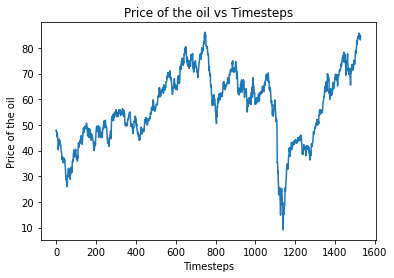

In [13]:
plt.plot(np.arange(len(oil_df['DATE'])),oil_df['DCOILBRENTEU'].values.astype(float))
plt.title('Price of the oil vs Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Price of the oil')

In [14]:
coin_df = pd.read_csv('coin_Bitcoin.csv')

In [15]:
coin_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [16]:
coin_df['Close'].isnull().sum()

0

In [17]:
date_edit = coin_df['Date'].values.tolist()
for i in range(len(date_edit)):
    date_edit[i] = date_edit[i][0:10]
coin_df['Date'] = date_edit

In [18]:
coin_df['Date']

0       2013-04-29
1       2013-04-30
2       2013-05-01
3       2013-05-02
4       2013-05-03
           ...    
2986    2021-07-02
2987    2021-07-03
2988    2021-07-04
2989    2021-07-05
2990    2021-07-06
Name: Date, Length: 2991, dtype: object

In [19]:
new_coin_df = coin_df[['Date','Close']]
new_coin_df

,Date,Close
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000
...,...,...
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456


In [20]:
new_coin_df['Close']

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548402
2988    35287.779766
2989    33746.002456
2990    34235.193451
Name: Close, Length: 2991, dtype: float64

In [21]:
print('min price of Bitcoin: ',new_coin_df['Close'].min())
print('max price of Bitcoin: ',new_coin_df['Close'].max())
print('mean price of Bitcoin: ',new_coin_df['Close'].mean())
print('std of price of Bitcoin: ',new_coin_df['Close'].std())

min price of Bitcoin:  68.43099975585938
max price of Bitcoin:  63503.45793019
mean price of Bitcoin:  6711.290443071496
std of price of Bitcoin:  11298.14192140347


Text(0, 0.5, 'Price of the Bitcoin')

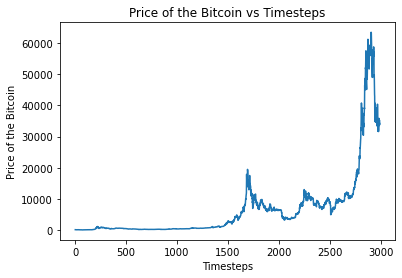

In [22]:
plt.plot(np.arange(len(new_coin_df['Date'])),new_coin_df['Close'].values.astype(float))
plt.title('Price of the Bitcoin vs Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Price of the Bitcoin')

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
def format_train_test (batch_size,data,percent,num_predicts):
    length_train = int(data.shape[0]*(1-percent))
    a1 = length_train//batch_size
    length_train = batch_size*a1
    train_data = data.iloc[:,1:2].values
    train_data = scaler.fit_transform(train_data)
    train_set = []
    train_label = []
    for i in range(length_train):
        train_set.append(train_data[i:i + num_predicts])
        train_label.append(train_data[i + num_predicts:i + 2*num_predicts])
    
    length_test = int(data.shape[0] - length_train - 4*num_predicts)
    a2 = length_test//batch_size
    length_test = int(batch_size*a2) 
    test = data.iloc[:,1:2].values
    test = scaler.fit_transform(test)
    test_data = test[length_train + 2*num_predicts:length_train + length_test + 4*num_predicts]
    test_set = []
    test_label = []
    for j in range(length_test):
        test_set.append(test_data[j:j + num_predicts])
        test_label.append(test_data[j + num_predicts:j + 2*num_predicts])
        
    
    train_set = np.reshape(np.array(train_set),(np.array(train_set).shape[0], np.array(train_set).shape[1], 1))
    train_label = np.reshape(np.array(train_label),(np.array(train_label).shape[0], np.array(train_label).shape[1]))
    test_set = np.reshape(np.array(test_set),(np.array(test_set).shape[0], np.array(test_set).shape[1], 1))
    test_label = np.reshape(np.array(test_label),(np.array(test_label).shape[0], np.array(test_label).shape[1]))
    
    return train_set, train_label, test_set, test_label
    

In [19]:
train_set, train_label, test_set, test_label = format_train_test(64,new_coin_df,0.2,5)

train_set, train_label, test_set, test_label = map(torch.tensor,(train_set, train_label, test_set, test_label))

train = TensorDataset(train_set, train_label)
train_tensor = DataLoader(train, batch_size = 64, shuffle=False)

test = TensorDataset(test_set, test_label)
test_tensor = DataLoader(test, batch_size= 64, shuffle=False)


In [20]:
class LSTM_model(nn.Module):
    def __init__(self, out_size, in_size, hidden_size1, hidden_size2,batch_size):
        super().__init__()
        self.batch_size = batch_size
        self.in_size = in_size
        self.out_size = out_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.lstm1 = nn.LSTM(input_size=self.in_size,hidden_size=self.hidden_size1,num_layers=2,batch_first=True)
        self.lstm2 = nn.LSTM(input_size=self.hidden_size1,hidden_size=self.hidden_size2,num_layers=2,batch_first=True)
        self.last = nn.Linear(self.hidden_size2, self.out_size)
    def forward(self,x,old_state):
        s1,state1 = self.lstm1(x,old_state)
        s2,state2 = self.lstm2(s1,state1)
        return self.last(s2), state2
    def initial_s(self, num_predicts):
        return (torch.zeros(2,self.batch_size, self.hidden_size1),
                torch.zeros(2,self.batch_size, self.hidden_size1))

In [21]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

In [22]:
model = LSTM_model(5,1,5,5,64)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
print(model)

LSTM_model(
  (lstm1): LSTM(1, 5, num_layers=2, batch_first=True)
  (lstm2): LSTM(5, 5, num_layers=2, batch_first=True)
  (last): Linear(in_features=5, out_features=5, bias=True)
)


In [27]:
def train_test(model,train_tensor,test_tensor,criterion,optimizer,device,num_predicts,iterations):
    for i in range(iterations):
        h0, c0 = model.initial_s(num_predicts)
        h, c = h0.to(device), c0.to(device)
        for (x,y) in train_tensor:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat, (h, c) = model(x.float(), (h, c))
            loss = criterion(y_hat, y.long())
            h = h.detach()
            c = c.detach()
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            h01, c01 = model.initial_s(num_predicts)
            h1, c1 = h01.to(device), c01.to(device)
            lost_val = 0
            for (x1, y1) in test_tensor:
                x1, y1 = x1.to(device), y1.to(device)
                y_hat1, (h1, c1) = model(x1.float(),(h1,c1))
                loss1 = criterion(y_hat1, y1.long())
                lost_val += loss1.item()
                h1 = h1.detach()
                c1 = c1.detach()
            lost_val /= len(x1)
            print(f"Iteration {i+1}\n********************")
            print('The loss for train is: ',loss.item())
            print('The loss for test is: ',lost_val)


In [28]:
train_test(model,train_tensor,test_tensor,criterion,optimizer,device,5,100)

Iteration 1
********************
The loss for train is:  1.580761194229126
The loss for test is:  0.2221520785242319
Iteration 2
********************
The loss for train is:  1.4932750463485718
The loss for test is:  0.20948922634124756
Iteration 3
********************
The loss for train is:  1.2867605686187744
The loss for test is:  0.17983133345842361
Iteration 4
********************
The loss for train is:  0.9603341221809387
The loss for test is:  0.1338758636265993
Iteration 5
********************
The loss for train is:  0.6447484493255615
The loss for test is:  0.09011944849044085
Iteration 6
********************
The loss for train is:  0.42319363355636597
The loss for test is:  0.05946787493303418
Iteration 7
********************
The loss for train is:  0.2900962829589844
The loss for test is:  0.04107495490461588
Iteration 8
********************
The loss for train is:  0.2100238800048828
The loss for test is:  0.03001663344912231
Iteration 9
********************
The loss for trai

Iteration 69
********************
The loss for train is:  0.0023341327905654907
The loss for test is:  0.0019883093518728856
Iteration 70
********************
The loss for train is:  0.0022670684847980738
The loss for test is:  0.001985856240935391
Iteration 71
********************
The loss for train is:  0.002202586503699422
The loss for test is:  0.0019836069222947117
Iteration 72
********************
The loss for train is:  0.0021408218890428543
The loss for test is:  0.0019816879103018437
Iteration 73
********************
The loss for train is:  0.0020813082810491323
The loss for test is:  0.0019798761459242087
Iteration 74
********************
The loss for train is:  0.0020231143571436405
The loss for test is:  0.0019785747717833146
Iteration 75
********************
The loss for train is:  0.0019691598135977983
The loss for test is:  0.001977394291316159
Iteration 76
********************
The loss for train is:  0.0019148109713569283
The loss for test is:  0.001976249657673179
Iter